In [1]:
 from qiskit import QuantumCircuit, transpile
 from qiskit_aer import Aer
 from qiskit.visualization import plot_histogram
 import matplotlib.pyplot as plt
 import numpy as np

Quantum Circuit:


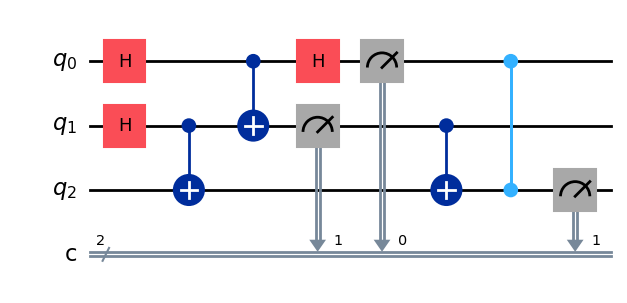

Measurement Results: {'10': 275, '00': 252, '11': 260, '01': 237}


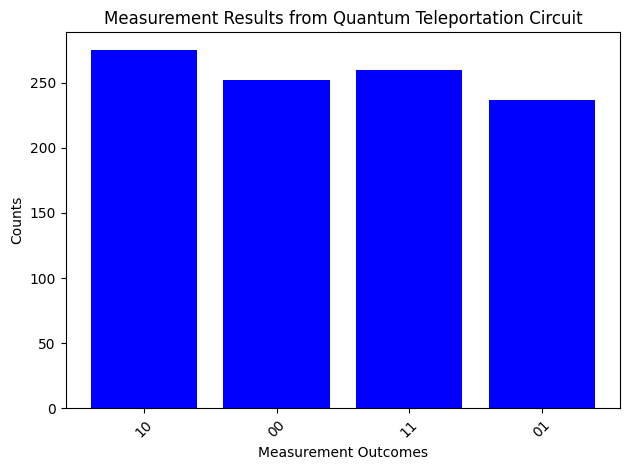

In [2]:
 # Step 1: Create the quantum teleportation circuit
 def quantum_teleportation_circuit():
    # Create a Quantum Circuit with 3 qubits and 2 classical bits
    qc = QuantumCircuit(3, 2)
    
    # Step 2: Create a Bell pair (entangled state)
    qc.h(1)  # Apply Hadamard gate to qubit 1
    qc.cx(1, 2)  # Apply CNOT gate between qubit 1 and qubit 2
    
    # Step 3: Prepare the state to be teleported (|psi⟩)
    # For demonstration, we'll use the state |+⟩ = (|0⟩ + |1⟩)/√2
    qc.h(0)  # Prepare the first qubit as |+⟩
    
    # Step 4: Bell Measurement
    qc.cx(0, 1)  # CNOT from qubit 0 to qubit 1
    qc.h(0)  # Apply Hadamard to qubit 0
    qc.measure([0, 1], [0, 1])  # Measure qubits 0 and 1
    
    # Step 5: Apply corrections based on measurement results
    qc.cx(1, 2)  # If |0⟩ is measured on qubit 1
    qc.cz(0, 2)  # If |1⟩ is measured on qubit 0
    
    # Measure the teleported qubit
    qc.measure(2, 1)  # Measure the teleported qubit
    
    return qc
 # Execute the quantum teleportation circuit and create a bar plot
 def run_teleportation_circuit():
    qc = quantum_teleportation_circuit()
    
    # Draw the quantum circuit
    print("Quantum Circuit:")
    display(qc.draw('mpl'))  # Use display for Jupyter notebooks
    
    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit)
    
    # Get the results directly without using `execute`
    result = job.result()
    
    # Get the counts (results of the measurement)
    counts = result.get_counts(qc)
    print("Measurement Results:", counts)
    
    # Create a bar plot for measurement results
    labels = list(counts.keys())
    values = list(counts.values())
    
    # Create a bar plot
    plt.bar(labels, values, color='blue')
    plt.xlabel('Measurement Outcomes')
    plt.ylabel('Counts')
    plt.title('Measurement Results from Quantum Teleportation Circuit')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()  # Ensure that the plot is displayed
 # Run the teleportation circuit
 run_teleportation_circuit()